<a href="https://colab.research.google.com/github/beatrizliramartins/Analise_PIB/blob/main/PIB_Per_Capta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_gdp = pd.read_csv("gdp.csv", decimal=".")

In [3]:
df_gdp.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

In [4]:
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))

In [5]:
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split(" ")[1].replace(",", "")))

In [6]:
df_gdp.head(3)

,Country,Region,Year,GDP_pp,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25


In [7]:
df_gdp.groupby("Country").min()["Year"]

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [8]:
df_gdp.groupby("Country").min()["Year"].value_counts()

1901    192
1991      1
Name: Year, dtype: int64

In [9]:
df_gdp.groupby("Country").min()["Year"][df_gdp.groupby("Country").min()["Year"] == 1991]

Country
Kosovo    1991
Name: Year, dtype: int64

In [10]:
df_gdp[df_gdp["Year"] < 2000]["Year"].max()


1996

In [11]:
df_gdp_start = df_gdp[(df_gdp["Year"] == 1901)]
df_gdp_end = df_gdp[(df_gdp["Year"] == 1996)]

In [12]:
((df_gdp_end.groupby("Region")["gdp_pp"].mean() / df_gdp_start.groupby("Region")["gdp_pp"].mean() -1) * 100).sort_values(ascending=False)

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: gdp_pp, dtype: float64

In [13]:
df_gdp.head()


,Country,Region,Year,GDP_pp,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,662.40


In [14]:
df_gdp.head()

,Country,Region,Year,GDP_pp,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,662.40


In [15]:
arr_years = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
df_all_years = pd.DataFrame(arr_years, columns=["Year"])
df_all_years.index = df_all_years["Year"]

df_years_off = ~df_all_years["Year"].isin(df_gdp["Year"])
df_years_off = df_years_off[df_years_off].index

In [16]:
df_all_years

,Year
Year,
1901,1901
1902,1902
1903,1903
1904,1904
1905,1905
...,...
2006,2006
2007,2007
2008,2008


In [17]:
df_years_off

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [18]:
df_gdp = df_gdp.sort_values(["Country", "Year"])

df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)

In [19]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_pp,delta_gdp,delta_year,gdp_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,520.17,-199.79,5.0,1.232


In [20]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [21]:
df_gdp.head(5)

,Country,Region,Year,GDP_pp,gdp_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,662.40,3.094,1926.0


In [22]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue

    # print(idx, row)
    year_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off >row["Year"])]

    for new_year in year_to_add:
        add_row = row.copy()
        add_row["gdp_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"]
        add_row["Year"] = new_year
        df_new_data["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [23]:
df_new_data

,kind,Country,Region,Year,GDP_pp,gdp_pp,gdp_year,next_year
0,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,613.99,616.0,2.01,1906.0
0,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,613.99,618.01,2.01,1906.0
0,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,613.99,620.02,2.01,1906.0
0,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,613.99,622.03,2.01,1906.0
1,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,624.04,626.082,2.042,1911.0
...,...,...,...,...,...,...,...,...
4416,estimated,Zimbabwe,Sub-Saharan Africa,2005,719.96,560.128,-39.958,2006.0
4417,estimated,Zimbabwe,Sub-Saharan Africa,2007,520.17,521.402,1.232,2011.0
4417,estimated,Zimbabwe,Sub-Saharan Africa,2008,520.17,522.634,1.232,2011.0
4417,estimated,Zimbabwe,Sub-Saharan Africa,2009,520.17,523.866,1.232,2011.0


In [24]:
df_gdp = pd.concat([df_gdp, df_new_data]).sort_values(["Country", "Year"])
df_gdp["kind"].fillna("real", inplace=True)
df_gdp.index = df_gdp["Year"]

In [25]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,613.99,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,613.99,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,613.99,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,613.99,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,520.17,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,520.17,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,520.17,523.866,1.232,2011.0,estimated


<Axes: xlabel='Year', ylabel='gdp_pp'>

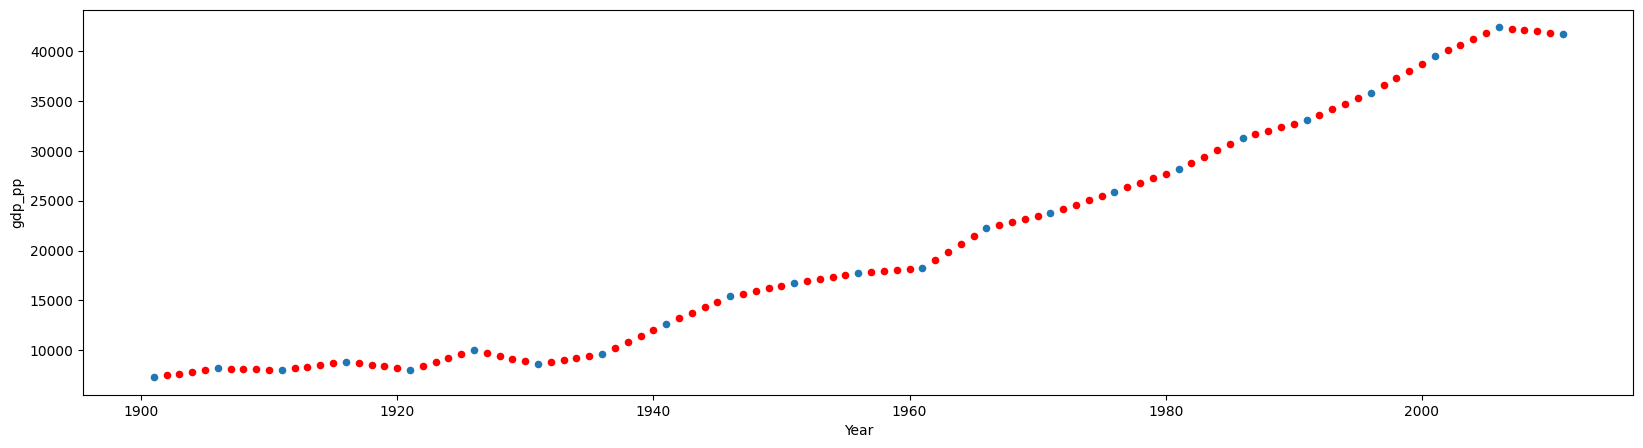

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax)
df_gdp[(df_gdp["kind"] == "estimated") & (df_gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="red")